In [1]:
#modules
import pandas as pd
import numpy as np
import sys
import os
from tqdm.notebook import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt
from src import data

### Work done previously

Scripts used before establishing the src/data library for this project

In [2]:
#gather all dStec data into one dataframe
#following Val's method of obtaining all text files
# all data is in the HashMap "dStecV_day" with keys 300-304
#each key has a dataframe of all the sTec Values

# def obtainStationPair(file : str):
#     '''
#     input: file name
#     output: grdStation + Day + _Satellite
#     '''
#     return file[:4] + file[12:16]

# days = [300, 301, 302, 303, 304]

# filePath = '../data/'
# folders = os.listdir(filePath)
# folders = sorted(folders)
# dStecValues_day = dict()
# start = 300
# for day in folders:
#     dayFp = filePath + day + '/'
#     dStec_data = list()
#     subFiles = os.listdir(dayFp)
#     for file in tqdm(subFiles):
#         idPair = obtainStationPair(file)
#         fileName = dayFp + file
#         df = pd.read_csv(fileName, sep='\t\t', index_col='sod')
#         df = df.rename(columns={'dsTEC/dt' : idPair})
#         dStec_data.append(df[idPair])
#     sTec_columns = pd.concat(dStec_data, axis=1)
#     dStecValues_day[start] = sTec_columns
#     start += 1

    
    
#use dStecValues_day to do any analysis

In [4]:
#begin accounting for daily averages of each station/satellite pair and plotting them accordingly
valueMap = dStecValues_day

dailyAvg = pd.DataFrame({'days': days}) #dataframe of all the daily averages from each sat/groundstation pair
for key in valueMap:
    currDf = valueMap[key]
    cols = list(currDf.columns)
    for stationPair in tqdm(cols):
        runMean = currDf[stationPair].mean()
        if stationPair in dailyAvg:
            dailyAvg.at[key - 300, stationPair] = runMean
        else:
            dailyAvg[stationPair] = np.full(5, np.nan)
            dailyAvg.at[key - 300, stationPair] = runMean
dailyAvg.set_index('days')


        

,pg2r_G03,pg2r_G17,ktpm_G22,pgf1_G17,pgf1_G03,pmau_G08,pmau_G20,pgf6_G13,pgf6_G07,mlsp_G12,...,pmau_G11,pmau_G05,ktpm_G07,pg2r_G26,ktpm_G13,pgf3_G26,pgf5_G01,pgf3_G15,pgf3_G09,pgf3_G12
days,,,,,,,,,,,,,,,,,,,,,
300,-0.000819,0.000095,-0.004905,0.001385,-0.000761,-0.001210,-0.000446,-0.002074,-0.002330,0.002025,...,-0.000384,0.000006,-0.002180,0.001501,-0.001919,NaN,NaN,NaN,NaN,NaN
301,-0.002515,0.000886,-0.004418,0.000961,-0.002627,-0.001191,-0.000759,-0.002438,-0.001877,0.002489,...,0.001215,0.000394,-0.001767,0.001271,-0.002565,-0.002975,0.000853,NaN,NaN,NaN
302,-0.003562,0.001510,-0.003284,0.001908,-0.005694,-0.000998,-0.000714,-0.001366,-0.001960,0.002603,...,0.001325,0.000192,-0.001797,0.001491,-0.001385,-0.001181,NaN,-0.001330,NaN,NaN
303,-0.003431,0.000530,-0.004717,0.000962,-0.003254,-0.001294,-0.000409,-0.002104,-0.001738,0.001364,...,-0.001269,0.000499,-0.001557,0.001366,-0.002191,-0.001221,-0.001233,-0.001140,-0.002408,NaN
304,-0.002642,0.001218,-0.003697,0.001398,-0.002655,-0.001031,-0.000735,-0.001489,-0.001943,0.001860,...,0.000656,0.000289,-0.001836,0.001448,-0.001488,-0.000527,0.000314,-0.001004,-0.000973,-0.0017


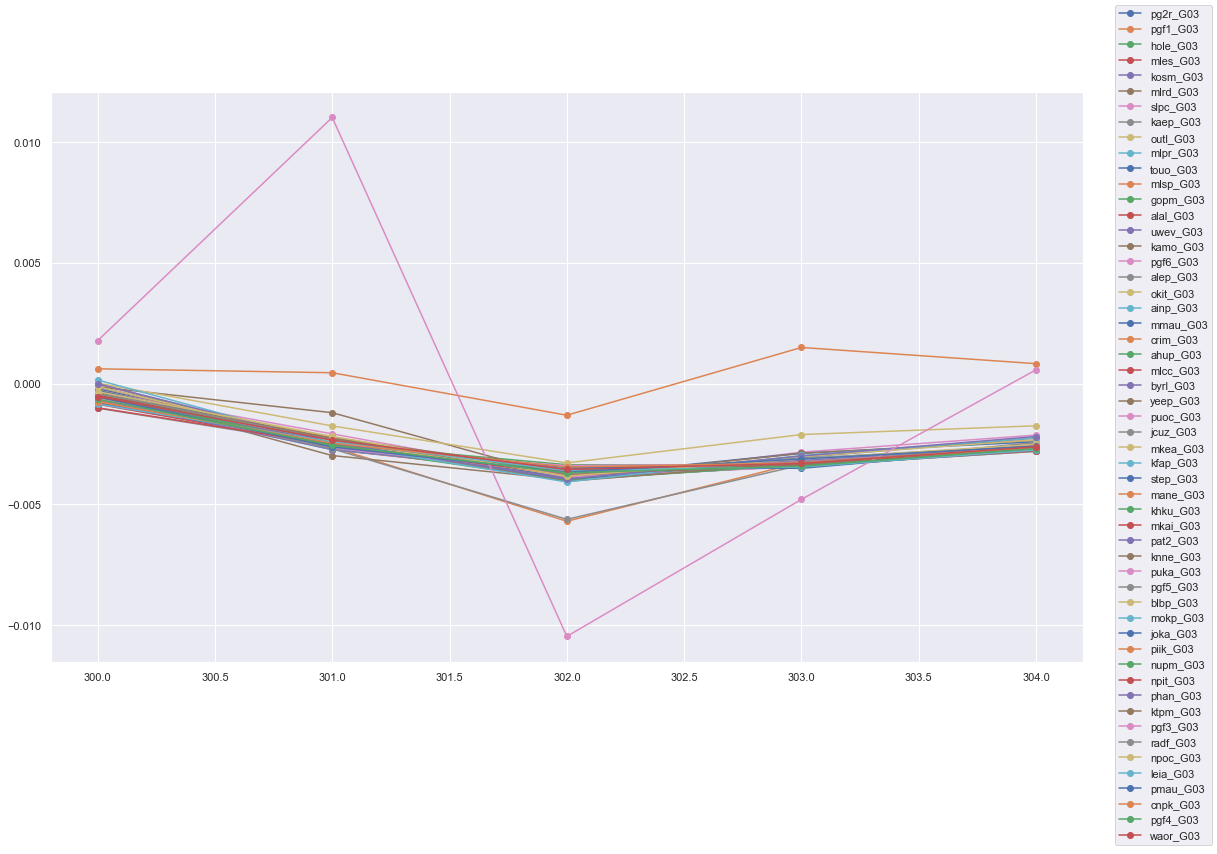

In [103]:
#plot for daily averages given a satellite ID
def plot_Satellite(satellite: str, dataF: pd.DataFrame):
    sns.set(style="darkgrid")
    for col in dailyAvg.columns:
        if col == 'days' or col[5:8] != satellite:
            continue
        else:
            plt.plot('days', col, data=dataF, marker='o')

    
    return plt.gcf()
#sample plot of G03
a = plot_Satellite('G03', dailyAvg)
a.legend()
a.set_size_inches(18.5, 10.5)




### Work with src library

In [18]:
#read all the dataframes and concatenate all of them 
days = [i for i in range(300, 305)]
dfList = list()
for day in days:
    dayDf = data.read_day('hawaii', 2012, day)
    dfList.append(dayDf)
totalData = pd.concat(dfList)

100%|██████████| 1596/1596 [00:16<00:00, 98.04it/s] 


In [27]:
totalData['pg2r3010__G03']

timestamp
2012-10-26 00:00:15   NaN
2012-10-26 00:00:30   NaN
2012-10-26 00:00:45   NaN
2012-10-26 00:01:00   NaN
2012-10-26 00:01:15   NaN
                       ..
2012-10-30 23:58:45   NaN
2012-10-30 23:59:00   NaN
2012-10-30 23:59:15   NaN
2012-10-30 23:59:30   NaN
2012-10-30 23:59:45   NaN
Name: pg2r3010__G03, Length: 28804, dtype: float64